# Working with larger example (multiclass classification)

When we have more then 2 classes as an option, it's known as multiclass classification.
* This means if we have 3 different classes, it's multi-class classification.
* It also means if we have 100 different classes, it's multiclass classification

To practice multi-class classification, we're going to buuild a neural network to classify images of different items of clothing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

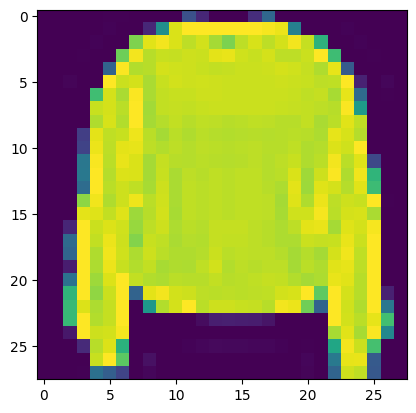

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
# Check out sample label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

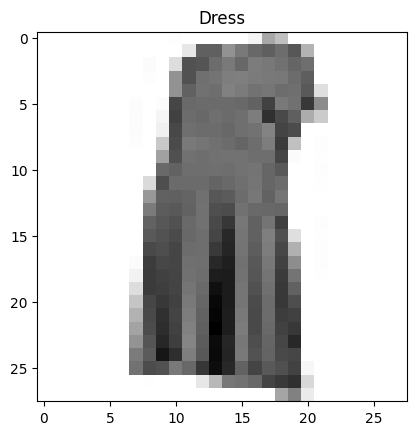

In [ ]:
# plot an example and its label
index_of_choice = 211
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

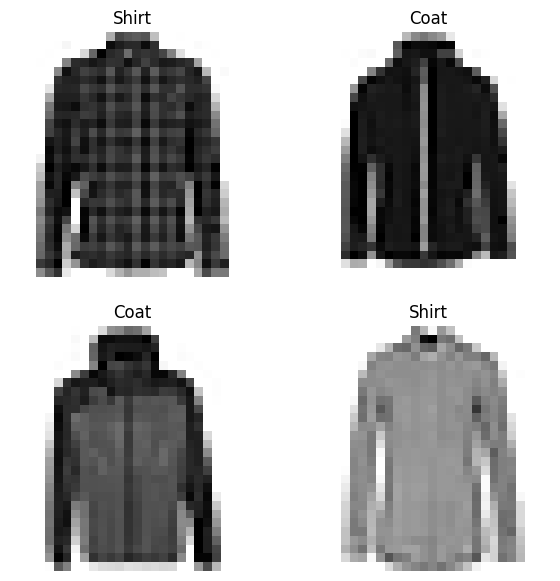

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

* Input shape = 28*28 (shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = CategoricalCrossentropy()
    * If the labels are one-hot encoded, use CategoricalCrossentropy()
    * If the labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax

In [ ]:
# Our data needs to be flattened (from 28*28 to None, 784)
Flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
Flatten_model.output_shape

(None, 784)

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_hostory = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.3680 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1

In [ ]:
# We can get out training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized lets build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3100 - accuracy: 0.4899 - val_loss: 0.8619 - val_accuracy: 0.6474
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7295 - accuracy: 0.7155 - val_loss: 0.6878 - val_accuracy: 0.7594
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6333 - accuracy: 0.7698 - val_loss: 0.6351 - val_accuracy: 0.7608
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6022 - accuracy: 0.7786 - val_loss: 0.6202 - val_accuracy: 0.7739
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5828 - accuracy: 0.7827 - val_loss: 0.6110 - val_accuracy: 0.7761
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5706 - accuracy: 0.7882 - val_loss: 0.6084 - val_accuracy: 0.7791
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5619 - accuracy: 0.7903 - val_loss: 0.6095 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

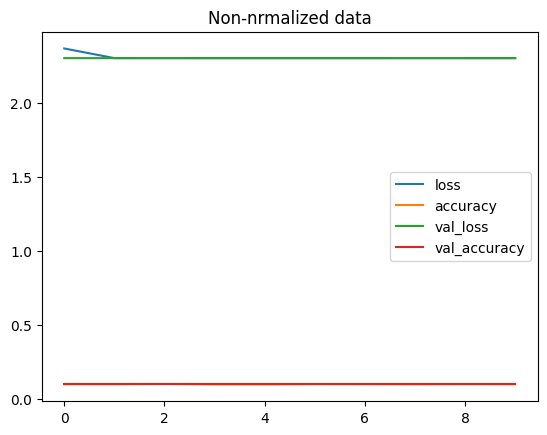

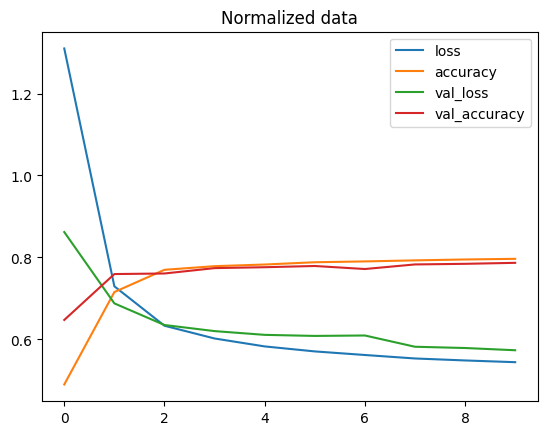

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_hostory.history).plot(title="Non-nrmalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                           train_labels,
                           epochs=40,
                           validation_data=(test_data_norm, test_labels),
                           callbacks=[lr_schedular])


Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3964 - accuracy: 0.4385 - val_loss: 1.1018 - val_accuracy: 0.5669 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0040 - accuracy: 0.5844 - val_loss: 0.9534 - val_accuracy: 0.6053 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9092 - accuracy: 0.6242 - val_loss: 0.8931 - val_accuracy: 0.6470 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8646 - accuracy: 0.6490 - val_loss: 0.8768 - val_accuracy: 0.6595 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8372 - accuracy: 0.6599 - val_loss: 0.8422 - val_accuracy: 0.6657 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8179 - accuracy: 0.6697 - val_loss: 0.8329 - val_accuracy: 0.6856 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

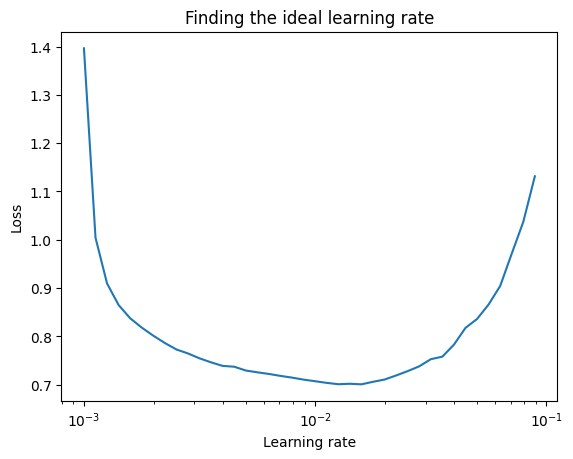

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Lets refit the model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1602 - accuracy: 0.5541 - val_loss: 0.8802 - val_accuracy: 0.6958
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8063 - accuracy: 0.7209 - val_loss: 0.7853 - val_accuracy: 0.7240
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7340 - accuracy: 0.7413 - val_loss: 0.7319 - val_accuracy: 0.7371
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6918 - accuracy: 0.7524 - val_loss: 0.7036 - val_accuracy: 0.7502
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6667 - accuracy: 0.7594 - val_loss: 0.6824 - val_accuracy: 0.7617
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6489 - accuracy: 0.7672 - val_loss: 0.6952 - val_accuracy: 0.7580
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6343 - accuracy: 0.7726 - val_loss: 0.6792 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classfication model we could:
* Evaluate its performance using other classificatin metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve it's results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # make it prettier
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label  size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plt the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.3526543e-09, 4.5144544e-11, 2.7097785e-10, 3.0789351e-16,
        1.0648572e-09, 3.7126669e-01, 1.7619409e-11, 7.6012604e-02,
        4.5472966e-06, 5.5271614e-01],
       [7.3241904e-06, 1.1502487e-20, 8.9451241e-01, 6.0067329e-12,
        6.2272035e-02, 2.4651935e-14, 4.3207578e-02, 0.0000000e+00,
        5.7784956e-07, 4.5427624e-22],
       [4.0142513e-03, 9.9583721e-01, 5.0932908e-07, 1.3551227e-04,
        9.6607633e-10, 1.6058909e-11, 9.8009468e-06, 6.8797304e-22,
        2.6161181e-06, 1.0646026e-14],
       [8.7936623e-03, 9.9025983e-01, 2.9187402e-06, 8.8035682e-04,
        1.5275052e-08, 4.7681464e-10, 5.0790921e-05, 4.0402536e-19,
        1.2457764e-05, 4.1464412e-13],
       [1.3352858e-01, 2.2416667e-05, 2.4846885e-01, 1.3398597e-02,
        5.5996053e-02, 7.5686166e-06, 5.4330540e-01, 2.5068742e-17,
        5.2725640e-03, 7.7591855e-10]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data my model was trained on normalized data, we'll want to make predictions on normalized data.

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([5.3526543e-09, 4.5144544e-11, 2.7097785e-10, 3.0789351e-16,
        1.0648572e-09, 3.7126669e-01, 1.7619409e-11, 7.6012604e-02,
        4.5472966e-06, 5.5271614e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[729,   2,  18, 119,   6,   2, 110,   0,  14,   0],
       [ 13, 930,   2,  45,   1,   1,   8,   0,   0,   0],
       [ 21,   0, 530,  18, 184,   2, 241,   0,   4,   0],
       [ 20,   9,   3, 882,  31,   4,  44,   1,   6,   0],
       [  1,   0, 100,  51, 726,   1, 117,   0,   4,   0],
       [  0,   0,   0,   2,   0, 864,   1,  68,   8,  57],
       [138,   0,  79, 104, 157,   0, 493,   0,  29,   0],
       [  0,   0,   0,   0,   0,  32,   0, 917,   1,  50],
       [  1,   0,   1,  12,   7,  12,  31,   5, 931,   0],
       [  0,   0,   0,   0,   0,  22,   0,  48,   1, 929]])

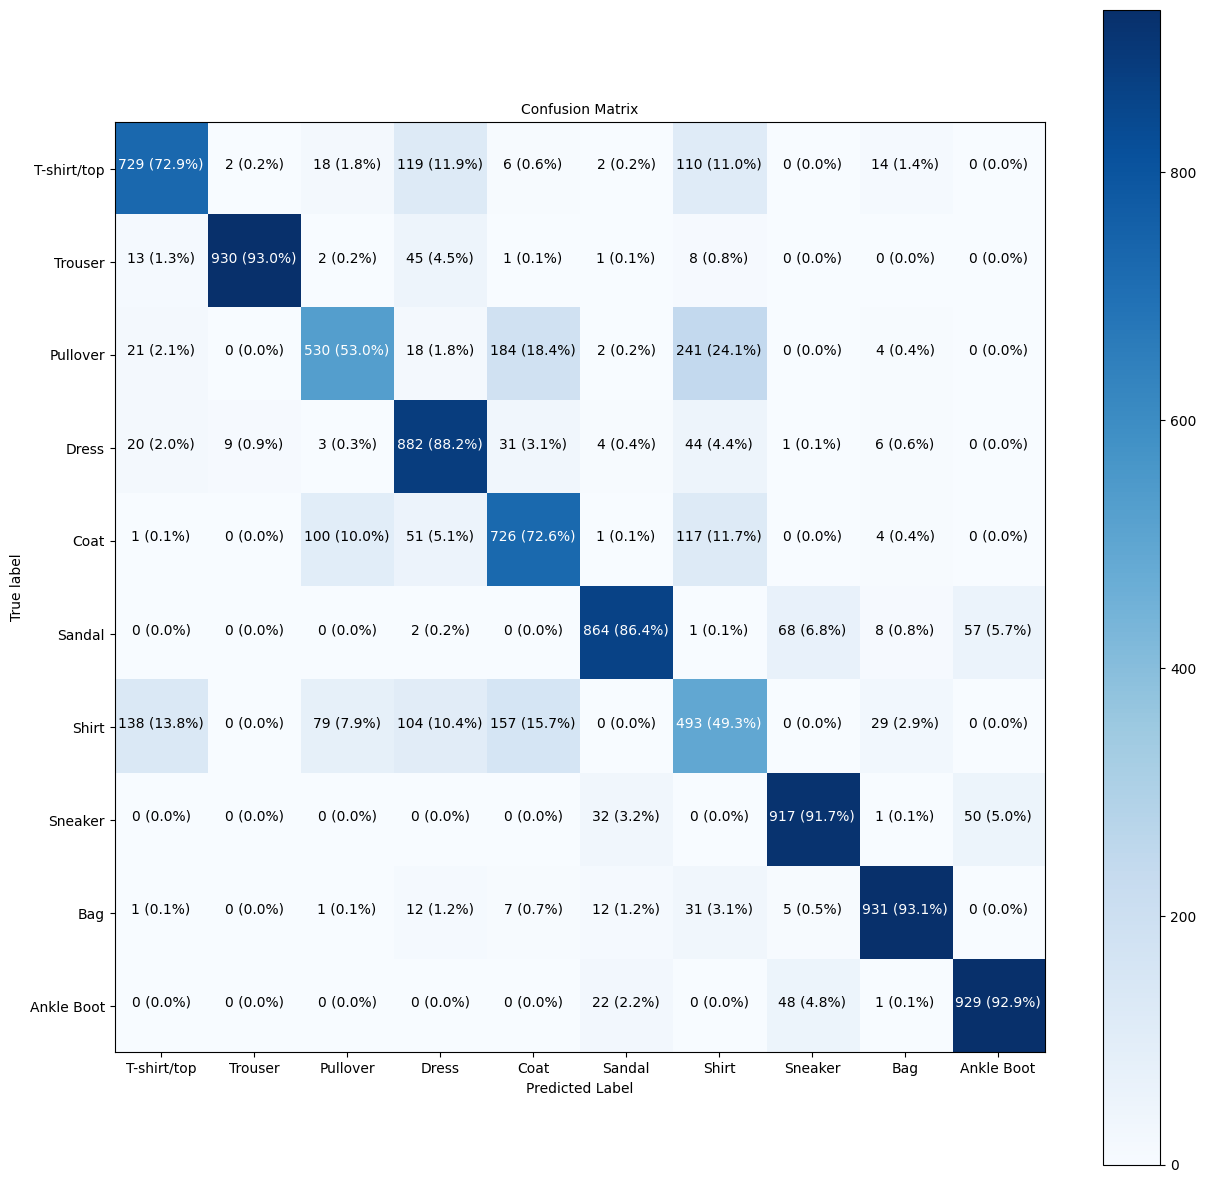

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

We can create a fun functin for
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label predicted label

In [ ]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_random_images(model, images, true_labels, classes, num_images=10):
    """
    Picks random images, plots them and labels them with predictions and truth labels.
    """
    plt.figure(figsize=(15, 6))  # Adjust the figure size to accommodate 10 images

    for i in range(num_images):
        random_index = random.randint(0, len(images) - 1)

        # Create predictions and targets
        target_image = images[random_index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[random_index]]

        # Subplot indexing starts at 1
        ax = plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(target_image, cmap=plt.cm.binary)

        # Change the color of the titles depending on if the prediction is right or wrong
        if pred_label == true_label:
            color = 'green'
        else:
            color = 'red'

        # Add xlabel information (prediction/true label)
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                         100 * tf.reduce_max(pred_probs),
                                                         true_label),
                                                         color=color)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 17ms/step


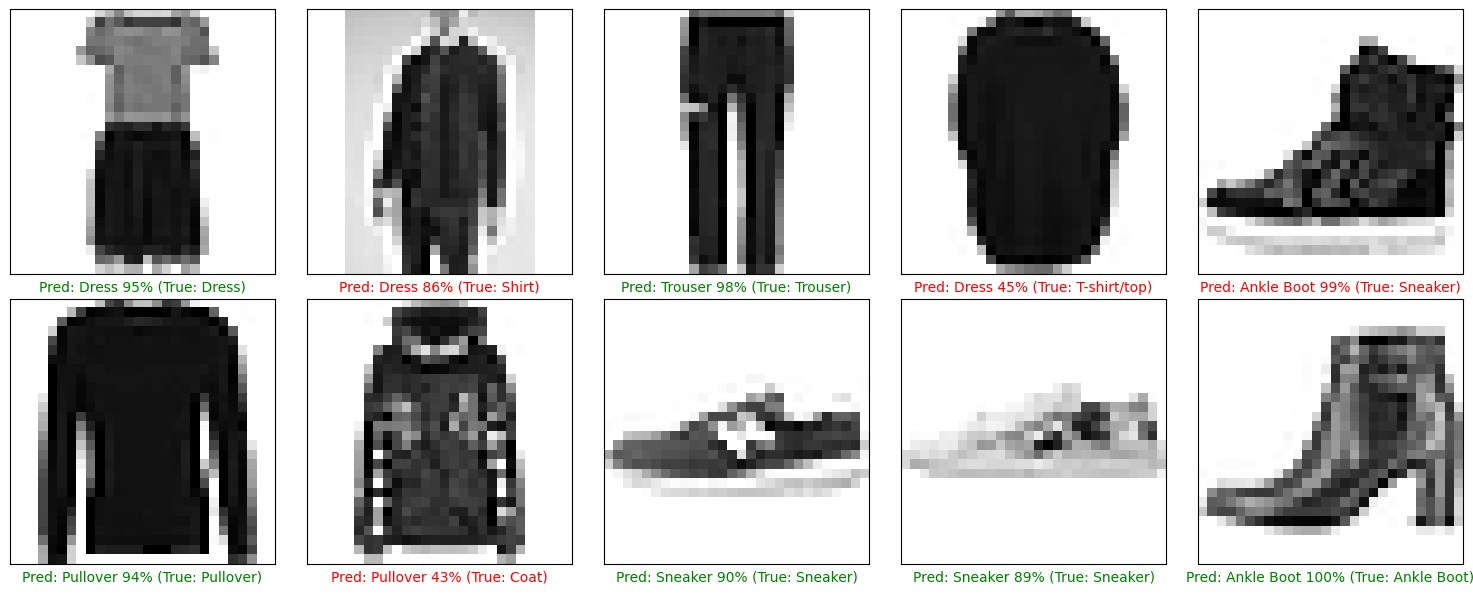

In [ ]:
# Check out random images as well as their predictions
plot_random_images(model=model_14,
                   images=test_data_norm,
                   true_labels=test_labels,
                   classes=class_names)

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.35605517,  0.395799  , -0.45104516, -0.64995646],
        [ 0.97794   ,  0.43083754,  0.6080127 , -1.0179819 ],
        [ 0.18620901,  1.1067042 ,  0.03985006, -0.7739847 ],
        ...,
        [-0.43610772,  0.7799371 ,  0.3877015 ,  0.32881156],
        [ 0.3894359 , -0.10009161,  0.71169084,  0.341049  ],
        [ 0.01123542,  0.73206204, -0.04057279, -0.4511334 ]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector

In [ ]:
# Biases and biases shapes
biases, biases.shape

(array([-1.2614771,  1.4772936,  1.6590449,  0.1523359], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intialized as zeros(at least in the case of a tensorflow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


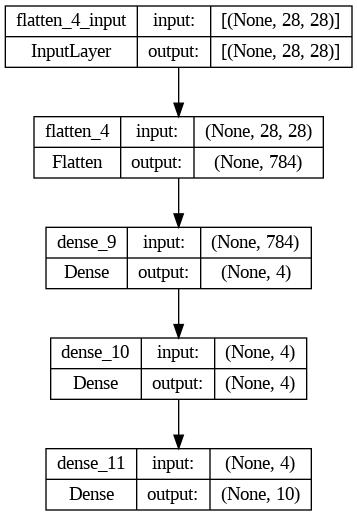

In [ ]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)